In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_1 = pd.read_csv("listings.csv")
# print(df.head)


/var/folders/fl/0yk74vyj4vl9y5m22szqkhjh0000gn/T/ipykernel_21866/258371782.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("listings.csv")


NameError: name 'df' is not defined

/var/folders/fl/0yk74vyj4vl9y5m22szqkhjh0000gn/T/ipykernel_86593/195595718.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(dataset1)


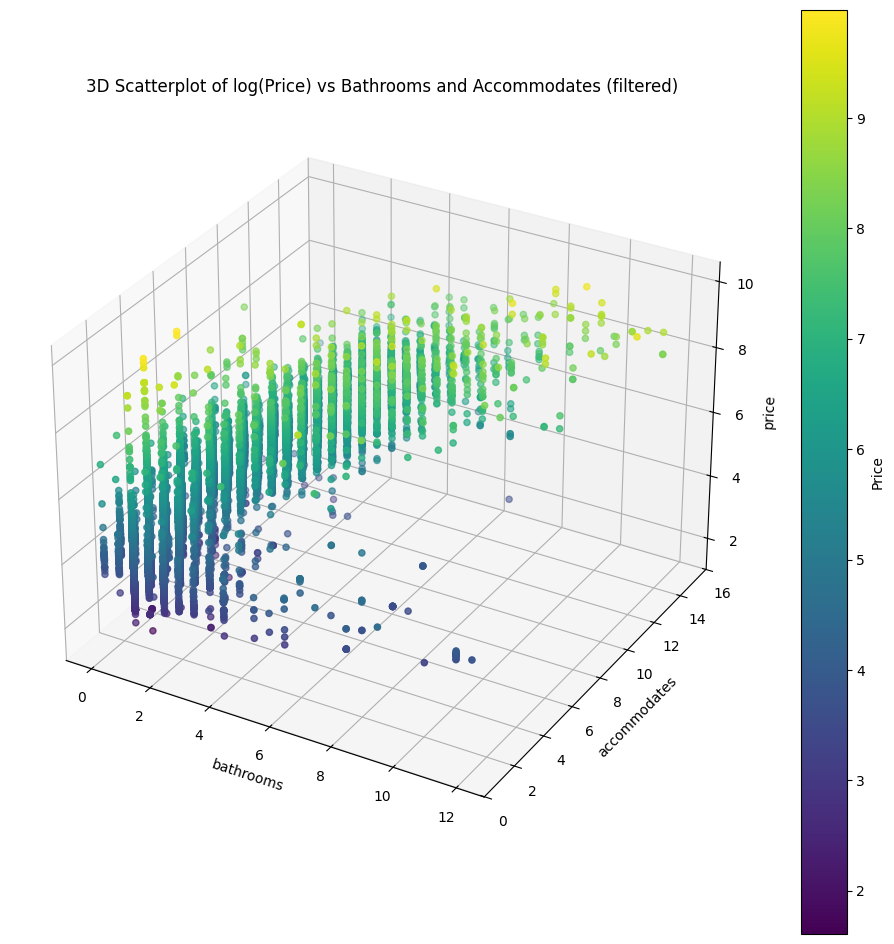

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
dataset1 = 'listings.csv'
df_1 = pd.read_csv(dataset1)

# Filter the dataset for prices below the threshold
price_threshold = df_1['price'].quantile(0.99)
filtered_prices = df_1['price'][df_1['price'] <= price_threshold]

# Drop rows where price is missing (essential for modeling)
df_1 = df_1.dropna(subset=['price'])

# Fill missing values for other columns if needed (example with mean imputation)
df_1['bathrooms'] = df_1['bathrooms'].fillna(df_1['bathrooms'].mean())



# dropping outlier in bathrooms
df_1.drop(df_1[df_1['bathrooms'] == df_1['bathrooms'].max()].index, inplace=True)

# dropping outlier in price
df_1.drop(df_1[df_1['price'] == df_1['price'].max()].index, inplace=True)

# dropping outlier in accommodates
df_1.drop(df_1[df_1['accommodates'] == df_1['accommodates'].max()].index, inplace=True)

df_1["price"] = np.log(df_1["price"])

# plot 3D graph
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(df_1["bathrooms"], df_1["accommodates"], df_1["price"], c = df_1["price"], cmap='viridis')
ax.set_title("3D Scatterplot of log(Price) vs Bathrooms and Accommodates (filtered)")
fig.colorbar(scatter, label='Price')
ax.set_xlabel("bathrooms")
ax.set_ylabel("accommodates")
ax.set_zlabel("price")


plt.show()

In [10]:
## https://semopy.com/tutorial.html
from semopy import Model 


# writing model and latent variable
desc = """
customer_experience =~ host_is_superhost + number_of_reviews + minimum_nights + host_response_rate + availability_365
price ~ bathrooms + bedrooms + accommodates + customer_experience
"""

# all variables need to be numeric for our model, so converting host_is_superhost to either 0 or 1 (false or true).
df_1['host_is_superhost'] = df_1['host_is_superhost'].replace({'t': 1, 'f': 0})

# creating model and fitting
model = Model(desc)
model.fit(df_1)

print(model.inspect())


# desc = """
# price ~ bathrooms + bedrooms
# """

# model = Model(desc)
# model.fit(df_1)

# print(model.inspect())



                   lval  op                 rval     Estimate   Std. Err  \
0     host_is_superhost   ~  customer_experience     1.000000          -   
1     number_of_reviews   ~  customer_experience   330.738726   8.621826   
2        minimum_nights   ~  customer_experience   -36.251824   0.988076   
3    host_response_rate   ~  customer_experience     0.204098   0.007145   
4      availability_365   ~  customer_experience  -176.090210   4.427824   
5                 price   ~            bathrooms     0.017754   0.000856   
6                 price   ~             bedrooms     0.020026   0.001018   
7                 price   ~         accommodates     0.027212   0.000427   
8                 price   ~  customer_experience     0.023386   0.004558   
9   customer_experience  ~~  customer_experience     0.033046   0.001263   
10     availability_365  ~~     availability_365  6370.689635  54.415284   
11    host_is_superhost  ~~    host_is_superhost     0.206369   0.001761   
12   host_re

In [46]:
df_1['accommodates'].corr(df_1['price'])

0.3619740358707157